In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
%store -r df_acoes
df_acoes.head()

,Papel,Cotação,P/L,Div.Yield,P/EBIT,Mrg Ebit,ROE
0,GNDI3,66.95,-3584.82,0.02,87.05,0.04,-0.00
1,AESB3,9.08,-1342.87,0.01,10.73,0.18,-0.00
2,PLDN4,486.00,-553.07,NaN,-75.56,-0.01,-0.00
3,LCSA4,35.09,-337.52,NaN,-505.80,-0.16,0.68
4,ONCO3,6.37,-331.88,NaN,9.19,0.09,-0.00


In [5]:
# Algumas estatísticas descritivas
estatistica = ['min', 'max', 'mean', 'std']

estat_cotação = df_acoes['Cotação'].aggregate(estatistica)
estat_pl = df_acoes['P/L'].aggregate(estatistica)
estat_dy = df_acoes['Div.Yield'].aggregate(estatistica)
estat_pebit = df_acoes['P/EBIT'].aggregate(estatistica)
estat_mrgebit = df_acoes['Mrg Ebit'].aggregate(estatistica)
estat_roe = df_acoes['ROE'].aggregate(estatistica)

estat_dados = [estat_cotação, estat_pl, estat_dy, estat_pebit, estat_mrgebit, estat_roe]
df_estatistica = pd.DataFrame(data=estat_dados, columns=estatistica)

df_estatistica['mean'] = round(df_estatistica['mean'], 2)
df_estatistica['std'] = round(df_estatistica['std'], 2)

print(df_estatistica)


               min       max   mean     std
Cotação       0.01  10081.90  63.48  522.29
P/L       -3584.82   2952.91   3.84  180.27
Div.Yield     0.01      5.22   0.10    0.32
P/EBIT    -7214.41    485.68 -18.12  310.49
Mrg Ebit   -764.54     60.00  -4.21   40.10
ROE         -82.47      7.16  -0.10    4.21


In [6]:
# Separando as 15 melhores e 15 piores de algun indicadores 

def melhores_e_piores(coluna, num_pro_iloc):

    new_df = df_acoes[coluna].sort_values(ascending=False)
    maiores_index = list(new_df.index[0:5])
    menores_index = list(new_df.index[-5:])

    maiores_acoes = df_acoes.iloc[maiores_index, [0, num_pro_iloc]]
    menores_acoes = df_acoes.iloc[menores_index, [0, num_pro_iloc]]

    return maiores_acoes, menores_acoes 
   

div_yld = melhores_e_piores('Div.Yield', 3)
mrg_ebt = melhores_e_piores('Mrg Ebit', 5)
roe = melhores_e_piores('ROE', 6)

# essa função retorna uma tupla, sendo [0] o df dos maiores e o [1] o df dos menores

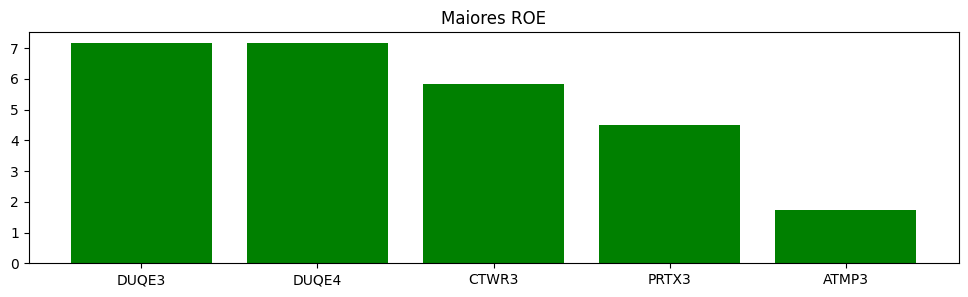

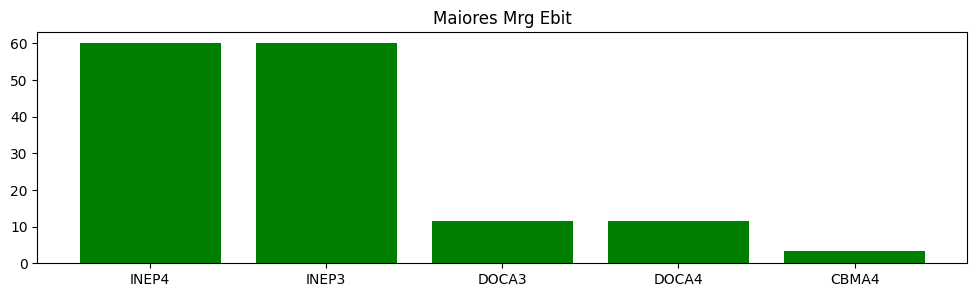

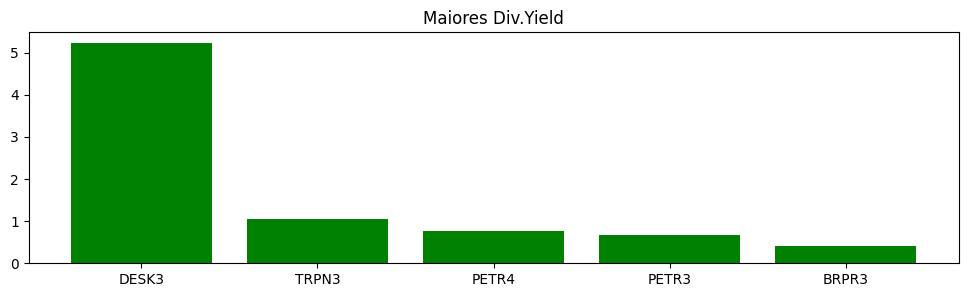

In [7]:
# Plotando os gráficos

def plota_grafico(nome, coluna):
    grafico = plt.figure()
    grafico.set_figwidth(12)
    grafico.set_figheight(3)
    
    plt.bar(nome[0]['Papel'], nome[0][coluna], color='green')
    plt.title(label=f'Maiores {coluna}')

plota_grafico(roe, 'ROE')
plota_grafico(mrg_ebt, 'Mrg Ebit')
plota_grafico(div_yld, 'Div.Yield')

In [8]:
# Calculando todas as correlações

correlacoes = {}

for i in df_acoes:
    if(i != 'Papel'):
        c_0 = df_acoes[f'{i}'].corr(df_acoes['Cotação'])
        c_1 = df_acoes[f'{i}'].corr(df_acoes['P/L'])
        c_2 = df_acoes[f'{i}'].corr(df_acoes['Div.Yield'])
        c_3 = df_acoes[f'{i}'].corr(df_acoes['P/EBIT'])
        c_4 = df_acoes[f'{i}'].corr(df_acoes['Mrg Ebit'])
        c_5 = df_acoes[f'{i}'].corr(df_acoes['ROE'])

        correlacoes.update({f'{i} e Cotação' :round(c_0, 4)})
        correlacoes.update({f'{i} e P/L' : round(c_1, 4)})
        correlacoes.update({f'{i} e D.Y' : round(c_2, 4)})
        correlacoes.update({f'{i} e P/Ebit' : round(c_3, 4)})
        correlacoes.update({f'{i} e M.E' : round(c_4, 4)})
        correlacoes.update({f'{i} e Roe' : round(c_5, 4)})


In [9]:
# Fazendo um Data frame com as correlações

colunas_e_linhas = df_acoes.columns[1:]
df_correl_dados = list(correlacoes.values())
df_correl = pd.DataFrame(columns=colunas_e_linhas, index=colunas_e_linhas)

df_correl['Cotação'] = df_correl_dados[0:6]
df_correl['P/L'] = df_correl_dados[6:12]
df_correl['Div.Yield'] = df_correl_dados[12:18]
df_correl['P/EBIT'] = df_correl_dados[18:24]
df_correl['Mrg Ebit'] = df_correl_dados[24:30]
df_correl['ROE'] = df_correl_dados[30:]

df_correl

,Cotação,P/L,Div.Yield,P/EBIT,Mrg Ebit,ROE
Cotação,1.0000,-0.0003,0.0137,-0.0017,-0.0094,0.0083
P/L,-0.0003,1.0000,0.0139,0.0204,-0.0050,0.0020
Div.Yield,0.0137,0.0139,1.0000,-0.0087,0.0190,0.0909
P/EBIT,-0.0017,0.0204,-0.0087,1.0000,0.0075,-0.0030
Mrg Ebit,-0.0094,-0.0050,0.0190,0.0075,1.0000,-0.0043
ROE,0.0083,0.0020,0.0909,-0.0030,-0.0043,1.0000


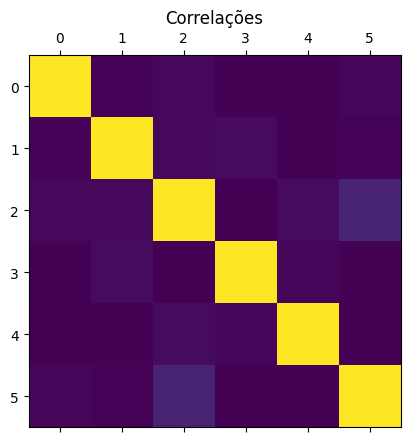

In [10]:
# Plotando o gráfico das maiores correlações

plt.matshow(A=df_correl)
plt.title(label= 'Correlações')
plt.show()
